#**Python for feature extraction**

# 1. Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["We become what we think about", "Happiness is not something readymade. It comes from your own actions"]

# initialize count vectorizer object
vect = CountVectorizer()

# get counts of each token (word) in text data
X = vect.fit_transform(corpus)

# convert sparse matrix to numpy array to view
X.toarray()

# view token vocabulary and counts
print("vocabulary", vect.vocabulary_)
print("shape", X.shape)
print("vectors: ", X.toarray())

vocabulary {'we': 13, 'become': 2, 'what': 14, 'think': 12, 'about': 0, 'happiness': 5, 'is': 6, 'not': 8, 'something': 11, 'readymade': 10, 'it': 7, 'comes': 3, 'from': 4, 'your': 15, 'own': 9, 'actions': 1}
shape (2, 16)
vectors:  [[1 0 1 0 0 0 0 0 0 0 0 0 1 2 1 0]
 [0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1]]


# 2. TF-IDF

In [ ]:
# Import Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# We prepare Text Data.
texts = [
    "good movie", "not a good movie", "did not like"
]

# Creating the TfidfVectorizer Object
tfidf = TfidfVectorizer(min_df=2, max_df=5, ngram_range=(1, 2))
# Converting text into a sparse matrix, where each row represents a text and each column represents a TF-IDF feature.
features = tfidf.fit_transform(texts)

pd.DataFrame(
    # Converts the sparse matrix into a dense matrix (a more readable format).
    features.todense(),
    columns=tfidf.get_feature_names_out()
)


,good,good movie,movie,not
0,0.57735,0.57735,0.57735,0.0
1,0.50000,0.50000,0.50000,0.5
2,0.00000,0.00000,0.00000,1.0


#3. Linguistic Features


In [ ]:
import spacy

# Load the spacy language model
nlp = spacy.load("en_core_web_sm")
doc = nlp("Spacy is an open-source library for advanced Natural Language Processing.")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Spacy spacy NOUN NN nsubj Xxxxx True False
is be AUX VBZ ROOT xx True True
an an DET DT det xx True True
open open ADJ JJ amod xxxx True False
- - PUNCT HYPH punct - False False
source source NOUN NN compound xxxx True False
library library NOUN NN attr xxxx True False
for for ADP IN prep xxx True True
advanced advanced ADJ JJ amod xxxx True False
Natural Natural PROPN NNP compound Xxxxx True False
Language Language PROPN NNP compound Xxxxx True False
Processing Processing PROPN NNP pobj Xxxxx True False
. . PUNCT . punct . False False


0. en_core_web_sm (Small-sized English model):
Size: Small (~12 MB).
Features: The smallest version of the English models, it doesn't have word vectors, so it relies more on rule-based approaches. It's lightweight and fast but less accurate for tasks like word similarity.

1. en_core_web_md (Medium-sized English model):
Size: Medium (~50 MB).
Features: Similar to en_core_web_sm, but includes word vectors, which allow for better word similarity and vector-based tasks like semantic analysis.

2. en_core_web_lg (Large-sized English model):
Size: Large (~300 MB).
Features: Includes much larger word vectors and more accurate syntactic parsing, entity recognition, and word similarity tasks.

3. en_core_web_trf (Transformer-based English model):
Size: Extra-large (~1.4 GB).
Features: Based on transformers like BERT (Bidirectional Encoder Representations from Transformers). It offers much better accuracy for most NLP tasks, including text classification, NER, and sentiment analysis, as transformers can handle complex language understanding.

Other Language Models:

*   de_core_news_sm: Small German model.
*   es_core_news_sm: Small Spanish model.
*   zh_core_web_sm: Small Chinese model.
*   fr_core_news_sm: Small French model.


In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

text = "Spacy is an open-source library for advanced Natural Language Processing."
doc = nlp(text)

# Create a list of token attributes that you want to display
data = [[token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop]
        for token in doc]

# Create a Pandas DataFrame from the list
df = pd.DataFrame(data, columns=["token.text", "token.lemma_", "token.pos_", "token.tag_", "token.dep_",
                                 "token.shape_", "token.is_alpha", "token.is_stop"])

# Display the DataFrame
print(df)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


    token.text token.lemma_ token.pos_ token.tag_ token.dep_ token.shape_  \
0        Spacy        spacy       NOUN         NN      nsubj        Xxxxx   
1           is           be        AUX        VBZ       ROOT           xx   
2           an           an        DET         DT        det           xx   
3         open         open        ADJ         JJ       amod         xxxx   
4            -            -      PUNCT       HYPH      punct            -   
5       source       source       NOUN         NN   compound         xxxx   
6      library      library       NOUN         NN       attr         xxxx   
7          for          for        ADP         IN       prep          xxx   
8     advanced     advanced        ADJ         JJ       amod         xxxx   
9      Natural      Natural      PROPN        NNP   compound        Xxxxx   
10    Language     Language      PROPN        NNP   compound        Xxxxx   
11  Processing   Processing      PROPN        NNP       pobj        Xxxxx   

# Word Embedding

**Static word embeddings** (**Word2Vec**, GloVe, FastText) generate fixed word vectors and are very effective for many traditional NLP tasks.

**Contextual word embeddings** ( Context2Vec (C2V), CoVe, universal language model fine-tuning (ULMFiT), **ELMo, BERT, GPT**, transformer-based models, unified pre-trained language model (UNILM)) can generate dynamic word vectors based on the surrounding context, which is very suitable for advanced NLP tasks that need to understand the meaning of words in different contexts.

Reference:
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10098736

# 4. Word2Vec

Word2vec is one of the most popular technique to learn word embeddings using a two-layer neural network.
Its input is a text corpus and its output is a set of vectors. Word embedding via word2vec can make natural language computer-readable, then further implementation of mathematical operations on words can be used to detect their similarities.

**Using the simplified Word2Vec Model**

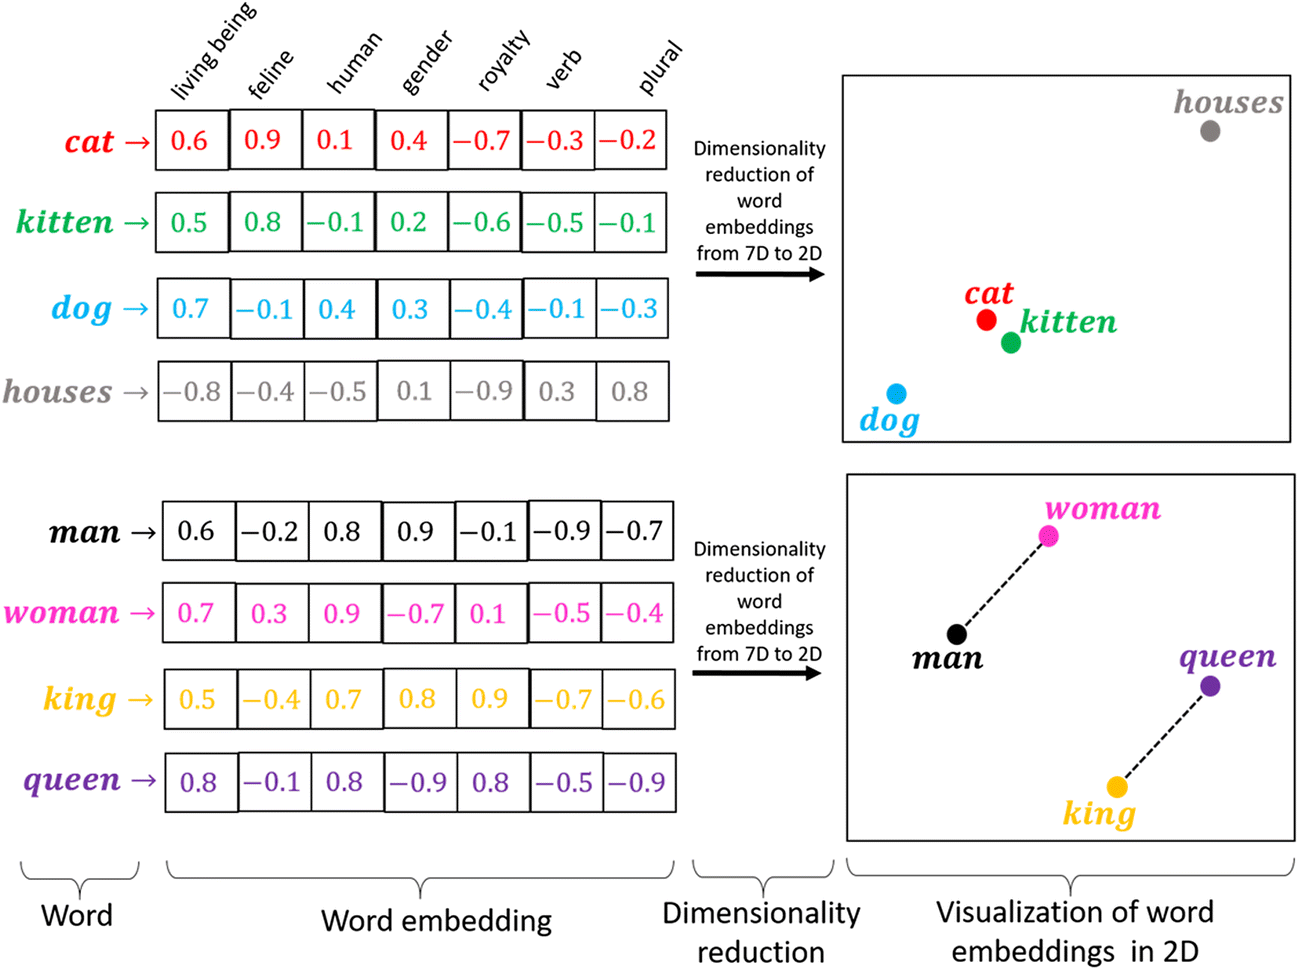

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving I_have_a_dream.txt to I_have_a_dream.txt


In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK vocabulary data (if not already installed)
nltk.download('punkt')

# Read the document
with open("I_have_a_dream.txt", 'r', encoding='utf-8') as file:
    document = file.read()

# Convert the document to lowercase and tokenize
tokens = word_tokenize(document.lower())

# Convert the tokenized document into training data (each document can be a list of multiple sentences)
data = [tokens]

# Train the Word2Vec model
model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, workers=4)

# Try to retrieve the word vector for the word 'dream'
if 'dream' in model.wv:
    word_vector = model.wv['dream']
    print(f"Word vector for 'dream': {word_vector}")
else:
    print("'dream' does not exist in the vocabulary")

# Get the word vectors for all words in the document and calculate the average (ignore words that do not exist)
valid_tokens = [word for word in tokens if word in model.wv]  # Filter out words not in the model vocabulary

if valid_tokens:
    document_vector = sum(model.wv[word] for word in valid_tokens) / len(valid_tokens)
    print("Average word vector for the document: ", document_vector)
else:
    print("No valid words in the document for calculating vectors.")

# Save the model
model.save("word2vec.model")

# Optionally save word vectors
word_vectors = model.wv
word_vectors.save("word_vectors.kv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Word vector for 'dream': [ 0.00867692  0.00942176  0.00189915 -0.00345647 -0.00056866 -0.00269617
 -0.00485437  0.0093678   0.00139426  0.00232109 -0.00710948  0.00577927
  0.00026269  0.00029939 -0.00875083  0.00268134  0.00743433  0.00531793
 -0.00665935 -0.01140507 -0.00421145  0.00115543 -0.00723689 -0.00835017
 -0.00339521  0.00195158 -0.01017956 -0.00494009 -0.00062117  0.00733217
  0.00402034 -0.00060478 -0.00651336 -0.00920159 -0.00133912  0.01062822
  0.0058265  -0.00293552 -0.00010182 -0.01209585 -0.0004762  -0.00636801
  0.00494986 -0.00197139 -0.00238832 -0.01050165 -0.0022172  -0.00814914
 -0.00078564 -0.00327479 -0.00134951 -0.00543305 -0.00875111 -0.00222451
  0.00046787 -0.00356137 -0.0063357  -0.00429441 -0.01095784 -0.00055928
  0.00620874 -0.00282792  0.00422464  0.00449425  0.00636574  0.00796971
  0.0104816  -0.0064555  -0.01076378 -0.00347608 -0.00800965 -0.00644476
 -0.005775   -0.00225162  0.00405511 -0.00147982 -0.0091812   0.0052359
 -0.00035379  0.00575856  0

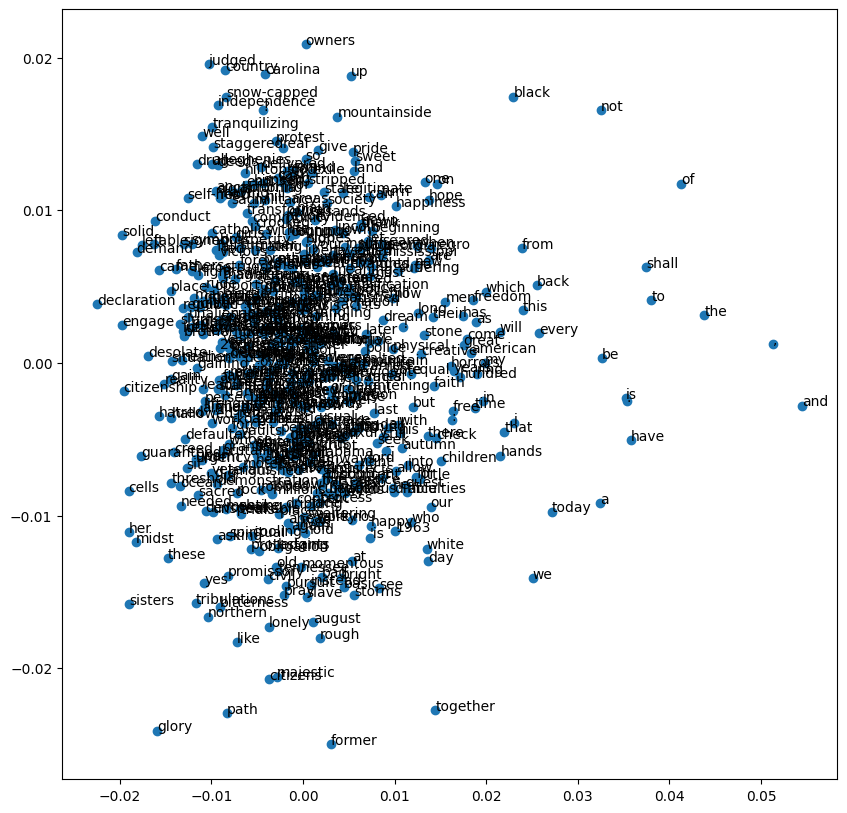

In [ ]:
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the saved word vectors
word_vectors = KeyedVectors.load("word_vectors.kv")

# Get the words and their corresponding vectors
words = list(word_vectors.index_to_key)  # Extract all the words in the vocabulary
word_vectors_matrix = [word_vectors[word] for word in words]  # Get the word vectors

# Apply PCA to reduce word vectors to two dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors_matrix)

# Create scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])

# Annotate each word in the plot
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

# Show the plot
plt.show()

Change some parameters

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK vocabulary data (if not already installed)
nltk.download('punkt')

# Read the document
with open("I_have_a_dream.txt", 'r', encoding='utf-8') as file:
    document = file.read()

# Convert the document to lowercase and tokenize
tokens = word_tokenize(document.lower())

# Convert the tokenized document into training data (each document can be a list of multiple sentences)
data = [tokens]

# Train the Word2Vec model
model = Word2Vec(sentences=data, vector_size=100, window=10, min_count=5, workers=4)

# Try to retrieve the word vector for the word 'dream'
if 'dream' in model.wv:
    word_vector = model.wv['dream']
    print(f"Word vector for 'dream': {word_vector}")
else:
    print("'dream' does not exist in the vocabulary")

# Get the word vectors for all words in the document and calculate the average (ignore words that do not exist)
valid_tokens = [word for word in tokens if word in model.wv]  # Filter out words not in the model vocabulary

if valid_tokens:
    document_vector = sum(model.wv[word] for word in valid_tokens) / len(valid_tokens)
    print("Average word vector for the document: ", document_vector)
else:
    print("No valid words in the document for calculating vectors.")

# Save the model
model.save("word2vec.model")

# Optionally save word vectors
word_vectors = model.wv
word_vectors.save("word_vectors.kv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word vector for 'dream': [-0.00175414  0.02395199 -0.00564514  0.01641749  0.00698345 -0.02616349
  0.02565094  0.02894522 -0.02140609 -0.02533426  0.0097132  -0.04120849
 -0.00231054  0.01345752  0.01680521 -0.01583689  0.02905753 -0.01612278
 -0.01009704 -0.03111949  0.01814832  0.02236125  0.02536389 -0.00305142
 -0.00946035 -0.00055517 -0.0334045  -0.00330637 -0.01771701  0.00325299
  0.02651647 -0.01547038  0.01507432 -0.0547592  -0.01713145  0.01278365
  0.01096188  0.01407934 -0.014464   -0.02057165 -0.00059784 -0.00845354
 -0.00722948 -0.00444566  0.01216486  0.00058037 -0.02420008 -0.01183035
  0.01241543  0.01626092  0.00876332 -0.02664116 -0.002178   -0.02065289
 -0.00152517 -0.009205    0.02060182 -0.00378455 -0.01062023  0.00807545
 -0.0082372  -0.01437839  0.02131211  0.00382626 -0.01293098  0.03392245
 -0.01135008  0.02515906 -0.03685937  0.01246006 -0.00327818  0.02158142
  0.02906311  0.00072039  0.02676282 -0.01741957 -0.01033253  0.01109628
 -0.0094715  -0.01999507 -

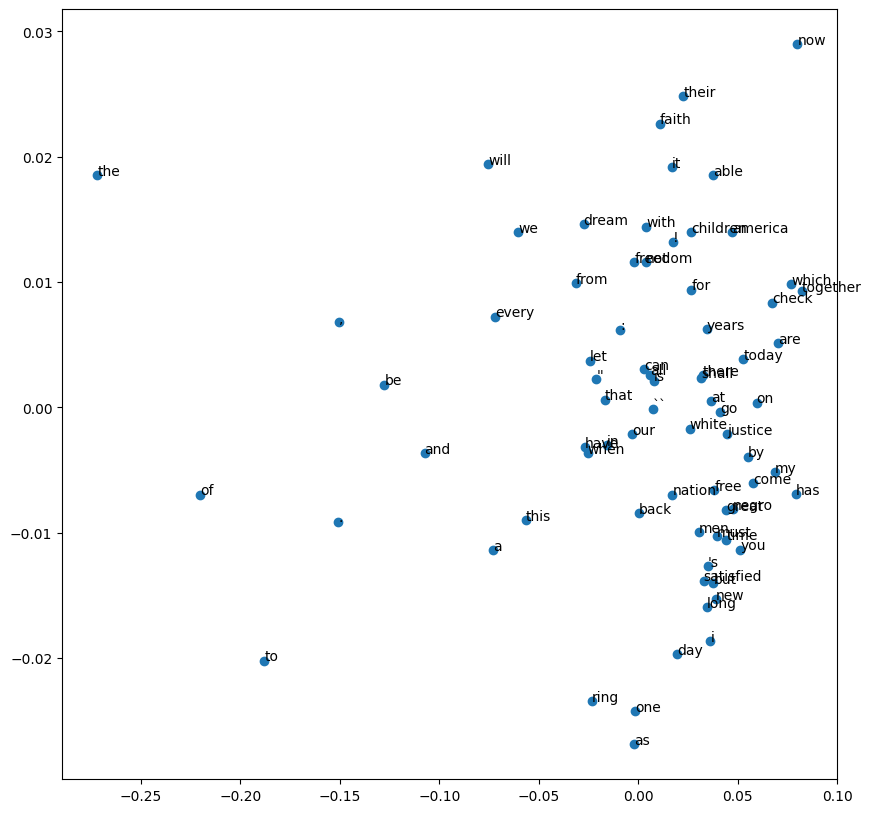

In [ ]:
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the saved word vectors
word_vectors = KeyedVectors.load("word_vectors.kv")

# Get the words and their corresponding vectors
words = list(word_vectors.index_to_key)  # Extract all the words in the vocabulary
word_vectors_matrix = [word_vectors[word] for word in words]  # Get the word vectors

# Apply PCA to reduce word vectors to two dimensions
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors_matrix)

# Create scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])

# Annotate each word in the plot
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

# Show the plot
plt.show()


**What does the result mean?**

Word embedding or word vector for the word. In Word2Vec, each word is represented as a dense vector of fixed length (in this case, 100 dimensions). These vectors capture the semantic meaning of words, meaning that words with similar meanings will have similar vectors in the vector space.

Average word embedding for the entire document (I_have_a_dream.txt). The average word vector provides a summary of the entire document. This representation captures an aggregate of the document's meaning, as it averages the semantic content of all the words. It is useful in document-level tasks, such as document classification or clustering.

**How to use this?**

You can use the word vectors for tasks such as finding similar words, clustering, or classification.
The average word vector can be used to compare this document to others (for similarity or clustering tasks) or as input to machine learning models for tasks like classification.



#Q1: Do you think the word 'watch' means the same thing in the following sentences?
'I like to watch TV'

'I am wearing a wrist watch'

Do you think the method we have learned before can express the different meanings of watch in these two sentences?

# 5. ELMo (Embeddings from Language Model) embeddings


# How is ELMo different from Word2Vec?
Unlike Glove and Word2Vec, ELMo represents embeddings for a word using the complete sentence containing that word. Therefore, ELMo embeddings are able to capture the context of the word used in the sentence and can generate different embeddings for the same word used in a different context in different sentences.

In [ ]:
pip install tensorflow tensorflow-hub

In [ ]:
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.17.0


In [ ]:
pip install tensorflow-hub --upgrade

  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.7.0
    Uninstalling tensorflow-hub-0.7.0:
      Successfully uninstalled tensorflow-hub-0.7.0


In [ ]:
import tensorflow_hub as hub
print(f"TensorFlow Hub version: {hub.__version__}")

TensorFlow Hub version: 0.16.1


In [ ]:
# Import necessary libraries
import tensorflow_hub as hub
import tensorflow as tf

# Load pre-trained ELMo model from TensorFlow Hub
elmo = hub.KerasLayer("https://tfhub.dev/google/elmo/3", trainable=False)

# Input sentences
sentences = [
    "I like to watch TV",
    "I am wearing a wrist watch"
]

# Convert input sentences to TensorFlow constants
sentences_tensor = tf.constant(sentences)

# Get the ELMo embeddings for the sentences
embeddings = elmo(sentences_tensor)

# Function to find word index in a sentence
def find_word_index(sentence, word):
    return sentence.split().index(word)

# Get the word embeddings for 'watch' in both sentences
word_to_extract = "watch"
index_sentence_1 = find_word_index(sentences[0], word_to_extract)  # Index of 'watch' in first sentence
index_sentence_2 = find_word_index(sentences[1], word_to_extract)  # Index of 'watch' in second sentence

# Print word embeddings for the word 'watch' in both contexts
print('Word embeddings for word "WATCH" in the first sentence:')
print(embeddings[0][index_sentence_1].numpy())

print('\nWord embeddings for word "WATCH" in the second sentence:')
print(embeddings[1][index_sentence_2].numpy())


Word embeddings for word "WATCH" in the first sentence:
-0.16883545

Word embeddings for word "WATCH" in the second sentence:
-0.075857185


Take I have a dream as an expample.

In [ ]:
# Import necessary libraries
import tensorflow_hub as hub
import tensorflow as tf

# Load pre-trained ELMo model from TensorFlow Hub
elmo = hub.KerasLayer("https://tfhub.dev/google/elmo/3", trainable=False)

# Step 1: Read your text file
file_name = 'I_have_a_dream.txt'
with open(file_name, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Step 2: Tokenize the text into sentences
# You can use NLTK's sent_tokenize or a simple split (in this case, simple split)
sentences = text_data.split('\n')  # Split by new lines (or use more advanced tokenization if needed)

# Filter out any empty sentences (in case of extra newlines)
sentences = [sentence for sentence in sentences if sentence.strip()]

# Step 3: Convert input sentences to TensorFlow constants
sentences_tensor = tf.constant(sentences)

# Step 4: Get the ELMo embeddings for the sentences
embeddings = elmo(sentences_tensor)

# Function to find word index in a sentence
def find_word_index(sentence, word):
    return sentence.split().index(word)

# Example: Get the word embeddings for 'dream' in one of the sentences
word_to_extract = "dream"

# Loop through the sentences to find embeddings for the word 'dream'
for i, sentence in enumerate(sentences):
    if word_to_extract in sentence:
        try:
            index = find_word_index(sentence, word_to_extract)
            print(f'Word embedding for "{word_to_extract}" in sentence {i+1}:')
            print(embeddings[i][index].numpy())  # Print the word embedding
        except ValueError:
            print(f'Word "{word_to_extract}" not found in sentence {i+1}.')

Word embedding for "dream" in sentence 19:
-0.0619006
Word embedding for "dream" in sentence 20:
-0.1367838
Word embedding for "dream" in sentence 21:
-0.24619272
Word embedding for "dream" in sentence 22:
-0.18882288
Word embedding for "dream" in sentence 23:
-0.21814214
Word embedding for "dream" in sentence 24:
0.009919917
Word embedding for "dream" in sentence 25:
-0.20862325
Word embedding for "dream" in sentence 26:
0.009919917
Word embedding for "dream" in sentence 27:
-0.07599639


In [ ]:
# Import necessary libraries
import tensorflow_hub as hub
import tensorflow as tf

# Load pre-trained ELMo model from TensorFlow Hub
elmo = hub.KerasLayer("https://tfhub.dev/google/elmo/3", trainable=False)

# Step 1: Read your text file
file_name = 'I_have_a_dream.txt'
with open(file_name, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Step 2: Tokenize the text into sentences
# You can use NLTK's sent_tokenize or a simple split (in this case, simple split)
sentences = text_data.split('\n')  # Split by new lines (or use more advanced tokenization if needed)

# Filter out any empty sentences (in case of extra newlines)
sentences = [sentence for sentence in sentences if sentence.strip()]

# Step 3: Convert input sentences to TensorFlow constants
sentences_tensor = tf.constant(sentences)

# Step 4: Get the ELMo embeddings for the sentences
embeddings = elmo(sentences_tensor)

# Step 5: Loop through each sentence and each word to display the word embeddings
for i, sentence in enumerate(sentences):
    print(f"\nSentence {i+1}: {sentence}")

    # Tokenize the sentence into words
    words = sentence.split()  # Simple split; you can use more advanced tokenization if needed

    # Loop through each word and display its embedding
    for j, word in enumerate(words):
        try:
            word_embedding = embeddings[i][j].numpy()  # Get the embedding for each word
            print(f'Word: "{word}" - Embedding: {word_embedding}')
        except IndexError:
            print(f"Word embedding for word '{word}' not found due to indexing issue.")



Sentence 1: Martin Luther King, Jr.
Word: "Martin" - Embedding: -0.6431900858879089
Word: "Luther" - Embedding: -0.25247037410736084
Word: "King," - Embedding: 0.023452967405319214
Word: "Jr." - Embedding: 0.6828153133392334

Sentence 2: I Have a Dream
Word: "I" - Embedding: -0.42265447974205017
Word: "Have" - Embedding: -0.4786515533924103
Word: "a" - Embedding: -0.3707624077796936
Word: "Dream" - Embedding: 0.21595680713653564

Sentence 3: delivered 28 August 1963, at the Lincoln Memorial, Washington D.C.
Word: "delivered" - Embedding: 0.13557259738445282
Word: "28" - Embedding: 0.22338542342185974
Word: "August" - Embedding: 0.04978753253817558
Word: "1963," - Embedding: 0.06922771036624908
Word: "at" - Embedding: -0.15999391674995422
Word: "the" - Embedding: -0.48187437653541565
Word: "Lincoln" - Embedding: 0.26293131709098816
Word: "Memorial," - Embedding: 0.5987938046455383
Word: "Washington" - Embedding: 0.6809952259063721
Word: "D.C." - Embedding: -0.04086839780211449

Sentenc

How to Use ELMo Embeddings:

**Contextualized Word Embedding:**

You can use ELMo embeddings for tasks like **word** **sense disambiguation, semantic similarity, or text classification**.

**Comparison of Contextual Meanings:**

If you want to analyze how the meaning of the word "dream" changes across sentences, you can compute the cosine similarity between the embeddings from different sentences to see how similar the contexts are.

Cosine Similarity: By measuring the similarity between different embeddings for "dream", you can quantify how the context influences the meaning of the word across different sentences. For example, if the cosine similarity between the embeddings for "dream" in sentence 19 and sentence 24 is close to 1, it means the word "dream" is used in a similar context in both sentences.

**Sentence or Document-Level Embeddings:**

You can aggregate the embeddings for a sentence or an entire document by averaging the ELMo embeddings for each word in a sentence/document. This would give you a sentence-level or document-level embedding, which can be used in tasks like sentence classification, sentiment analysis, or topic modeling.

Further Analysis:

Word-Level: Focus on the embeddings for keywords in your text, and analyze how their meanings shift across the document based on their context.

Sentence-Level: Compute the average or aggregate of all word embeddings in a sentence to create a sentence representation.

Document-Level: Combine all the embeddings across the document for tasks that need a holistic view of the text.

# 6. Bidirectional Encoder Representations from Transformers (BERT) Embeddings

BERT, which stands for Bidirectional Encoder Representations from Transformers, is based on Transformers, a deep learning model in which every output element is connected to every input element, and the weightings between them are dynamically calculated based upon their connection. (In NLP, this process is called attention.)

BERT can take as input either one or two sentences, and uses the special token [SEP] to differentiate them. The [CLS] token always appears at the start of the text, and is specific to classification tasks.\
\
Both tokens are always required, even if we only have one sentence, and even if we are not using BERT for classification. That’s how BERT was pre-trained, and so that’s what BERT expects to see.

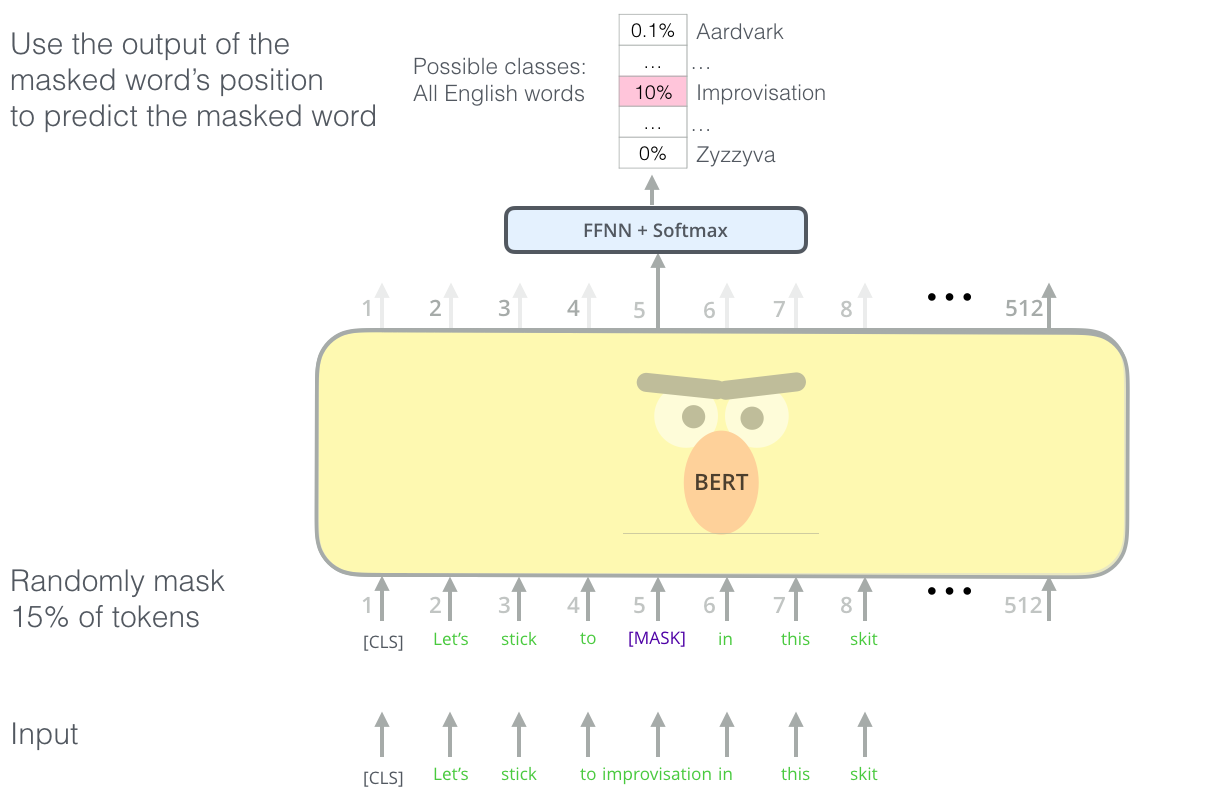

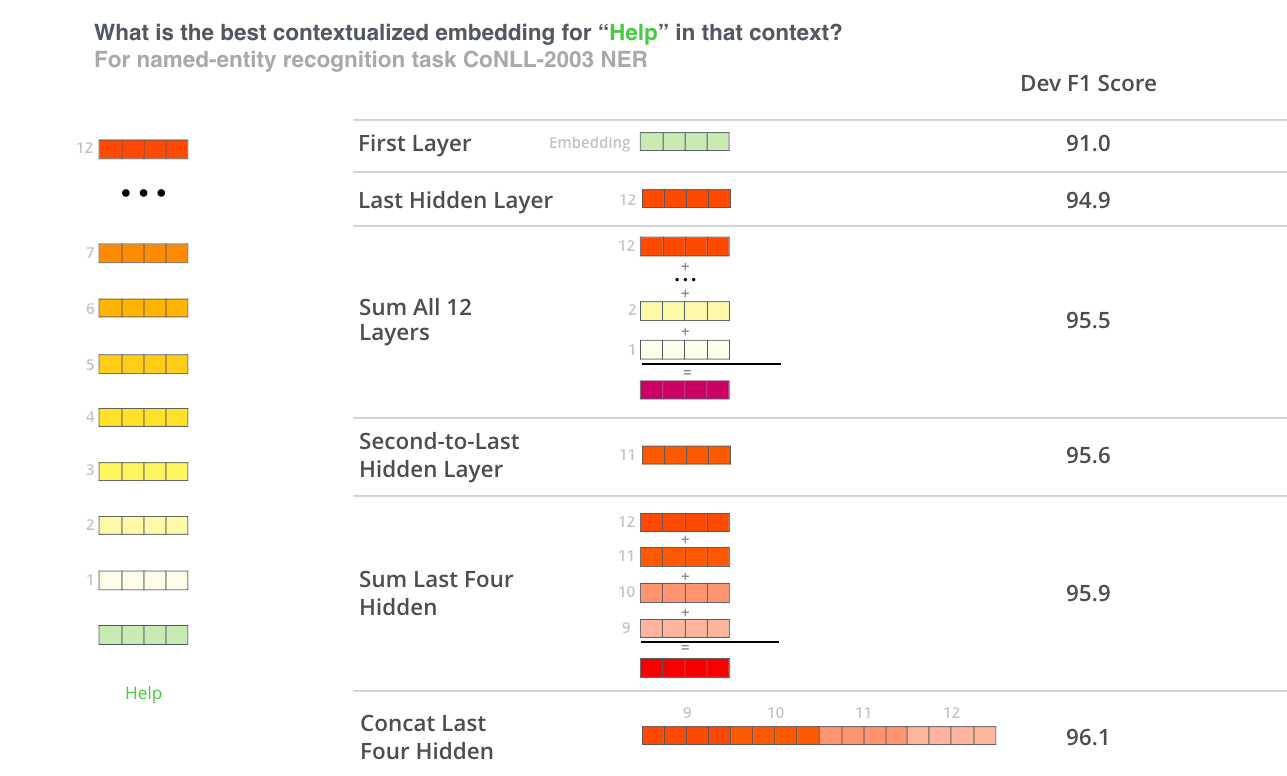

https://jalammar.github.io/illustrated-bert/

In [ ]:
!pip install transformers

Tokenizing text using BERT tokenizer

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
# bert-base-uncased version means that BERT will convert all input text to lowercase before processing.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Add the special tokens.
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)


# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']
[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


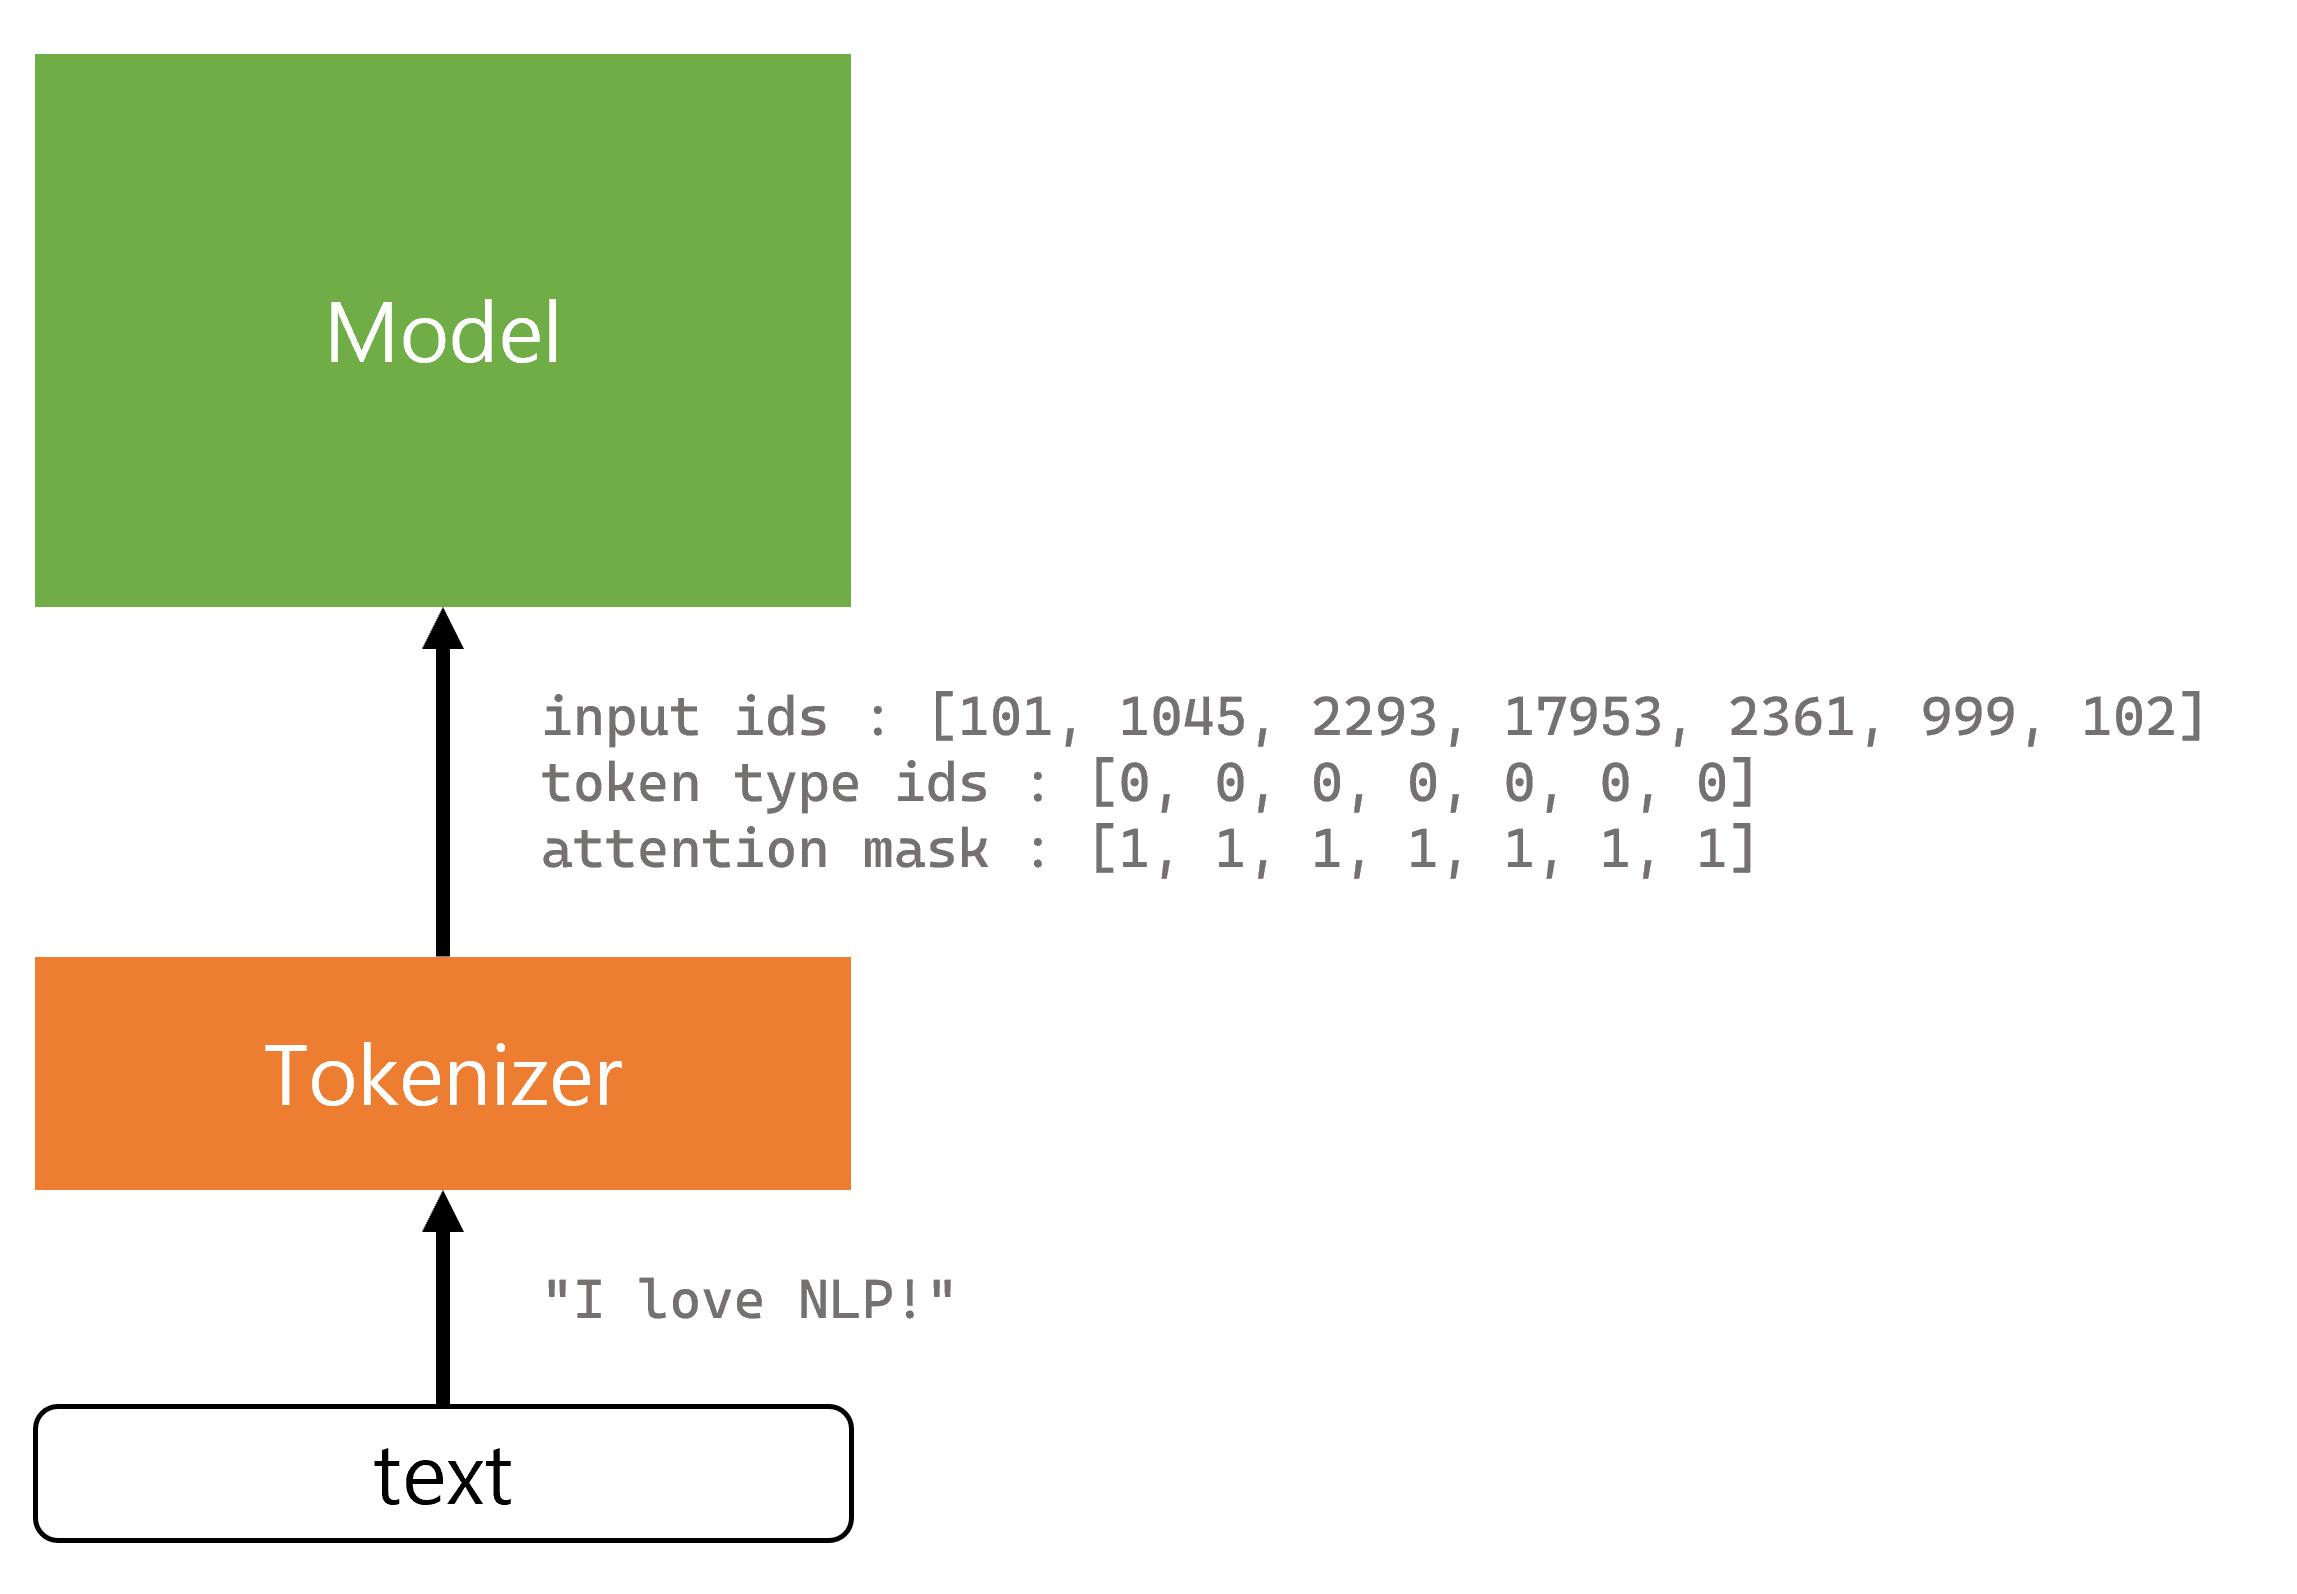

Tokenize text and generate corresponding input IDs and attention masks

In [ ]:
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Example text (make sure to define 'text')
text = "Spacy is an open-source library for advanced Natural Language Processing."

# Tokenize the text
encoding = bert_tokenizer.encode_plus(
    text,
    return_token_type_ids=False,
    padding="max_length",
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)

print(encoding)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

{'input_ids': tensor([[  101, 12403,  5666,  2003,  2019,  2330,  1011,  3120,  3075,  2005,
          3935,  3019,  2653,  6364,  1012,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [ ]:
bert_model(encoding['input_ids'], encoding['attention_mask'])[1]

tensor([[-0.8311, -0.3613, -0.6236,  0.5544,  0.5641, -0.2183,  0.1853,  0.2397,
         -0.3240, -0.9999, -0.3183,  0.6397,  0.9606, -0.2475,  0.6905, -0.3902,
          0.1414, -0.4223,  0.3265,  0.4081,  0.2560,  0.9996,  0.2371,  0.3663,
          0.3116,  0.8126, -0.5712,  0.8318,  0.8923,  0.7352, -0.2500,  0.1650,
         -0.9792, -0.0318, -0.6481, -0.9776,  0.3642, -0.6562,  0.3312, -0.1508,
         -0.8078,  0.4305,  0.9999, -0.5726,  0.4373, -0.2210, -0.9999,  0.2364,
         -0.8092,  0.6143,  0.3311,  0.5910,  0.1821,  0.3548,  0.4029, -0.3314,
         -0.2963, -0.0403, -0.1526, -0.5855, -0.4508,  0.1678, -0.3401, -0.8303,
          0.5666,  0.1314,  0.0225, -0.2084, -0.0603, -0.0265,  0.6480,  0.0516,
          0.0337, -0.5837,  0.0815,  0.2152, -0.5468,  1.0000, -0.2459, -0.9530,
          0.2690,  0.1827,  0.4958,  0.2225, -0.2298, -1.0000,  0.5170, -0.0938,
         -0.9682,  0.1351,  0.5095, -0.0967, -0.1941,  0.6003,  0.0487, -0.3102,
         -0.1191, -0.6982, -

You can use the reult for text classification or sentence similarity.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Sentence Similarity Matrix:
[[0.9999999  0.9864675  0.9638155  ... 0.9297308  0.81324005 0.95958304]
 [0.9864675  0.99999994 0.985272   ... 0.9555758  0.831498   0.97512543]
 [0.9638155  0.985272   1.0000001  ... 0.9787898  0.84600914 0.9792293 ]
 ...
 [0.9297308  0.9555758  0.9787898  ... 1.0000002  0.859103   0.958524  ]
 [0.81324005 0.831498   0.84600914 ... 0.859103   0.99999976 0.9072825 ]
 [0.95958304 0.97512543 0.9792293  ... 0.958524   0.9072825  1.0000001 ]]


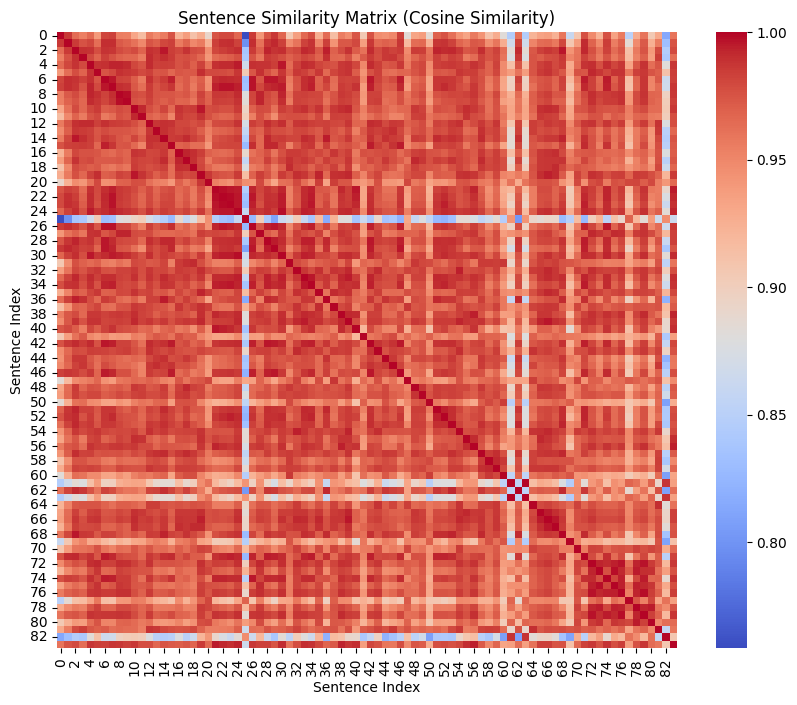

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import nltk

# Ensure that the necessary NLTK data is available for sentence tokenization
nltk.download('punkt')

# Step 1: Load your document text and split it into sentences
file_name = 'I_have_a_dream.txt'
with open(file_name, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Split the text into sentences using NLTK's sentence tokenizer
sentences = nltk.sent_tokenize(text_data)

# Load BERT tokenizer and model
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a sentence
def get_sentence_embedding(sentence):
    # Tokenize the sentence and return input IDs and attention mask
    encoding = bert_tokenizer.encode_plus(
        sentence,
        return_token_type_ids=False,  # We don't need token type IDs for this task
        padding="max_length",         # Pad sentences to the maximum length for consistency
        truncation=True,              # Truncate if sentence is too long
        return_attention_mask=True,   # Attention mask to ignore padded tokens
        return_tensors='pt'           # Return as PyTorch tensors
    )

    # Forward pass through BERT to get embeddings
    with torch.no_grad():  # No need to calculate gradients, just get embeddings
        outputs = bert_model(encoding['input_ids'], encoding['attention_mask'])

    # Get the pooled output (corresponding to the [CLS] token)
    pooled_output = outputs[1]  # [1] gives the pooled output
    return pooled_output

# Step 2: Compute embeddings for each sentence
sentence_embeddings = []
for sentence in sentences:
    embedding = get_sentence_embedding(sentence)
    sentence_embeddings.append(embedding)

# Convert the list of tensors to a single tensor (stacking them)
sentence_embeddings = torch.stack(sentence_embeddings).squeeze(1)

# Convert the tensor to a NumPy array for cosine similarity calculation
sentence_embeddings_np = sentence_embeddings.numpy()

# Step 3: Calculate cosine similarity between sentence embeddings
similarity_matrix = cosine_similarity(sentence_embeddings_np)

# Print similarity matrix (optional)
print("Sentence Similarity Matrix:")
print(similarity_matrix)

# Optional: Plot the similarity matrix using Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=False, cmap='coolwarm')
plt.title("Sentence Similarity Matrix (Cosine Similarity)")
plt.xlabel("Sentence Index")
plt.ylabel("Sentence Index")
plt.show()


#Reference:
https://huggingface.co/docs/transformers/model_doc/bert

# 7. GPT-3 (Generative Pre-trained Transformer 3)  embeddings

Generative Pre-trained Transformer 3 (GPT-3) is an autoregressive language model released in 2020 that uses deep learning to produce human-like text.\
Given an initial text as prompt, it will produce text that continues the prompt.

https://platform.openai.com/docs/guides/embeddings/embedding-models

In [ ]:
pip install -q openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
import openai
import numpy as np
import numpy as np
import pandas as pd
import json
from tqdm.notebook import tqdm
import os
from openai import OpenAI

# Adjusts the maximum column width
pd.set_option('display.max_colwidth', 10000)
MAX_COMMENT_LEN = 1024

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    # https://platform.openai.com/account/api-keys
    api_key=("sk-proj-(Input your own API_KEY)A"),
)

MAX_COMMENTS_TO_PROCESS = 2000000
#https://platform.openai.com/docs/guides/embeddings/embedding-models
ENGINE = 'text-similarity-ada-001'
DEBUG = False


# https://platform.openai.com/overview
# https://beta.openai.com/docs/guides/embeddings/what-are-embeddings
ENGINE_PRICE_PER_TOKEN = {
    'text-similarity-davinci-001': 0.6 / 1000,
    'text-similarity_curie-001': 0.06 / 1000,
    'text-similarity-babbage-001': 0.012 / 1000,
    'text-similarity-ada-001': 0.008 / 1000
}

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CognitivePresence.csv to CognitivePresence.csv


In [ ]:
df_train = pd.read_csv('CognitivePresence.csv')

In [ ]:
df_train.head()

,post_id,post_title,Summary_post_title,post_score,post_url,comment_id,parent_id,comment_depth,comment_body,comment_likes,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,179upqc,"Report - ChatGPT's impact on programming education.The report on Programiz focuses on how ChatGPT has influenced programming education. Key findings reveal that 62% of learners use ChatGPT multiple times per week for coding, with 67% utilizing it to understand programming concepts. A significant portion of respondents prefer ChatGPT over traditional lectures, and many anticipate shifts in programming jobs due to AI. The report highlights the need for educational institutions to adapt their curriculum for ChatGPT's impact, with 85% supporting this change in education.","Report - ChatGPT's impact on programming education.The report on Programiz focuses on how ChatGPT has influenced programming education. Key findings reveal that 62% of learners use ChatGPT multiple times per week for coding, with 67% utilizing it to understand programming concepts. A significant portion of respondents prefer ChatGPT over traditional lectures, and many anticipate shifts in programming jobs due to AI. The report highlights the need for educational institutions to adapt their curriculum for ChatGPT's impact, with 85% supporting this change in education.",314.0,https://programiz.pro/report,k5927j6,k58wxl9,1.0,Theres a big self selection bias People who use ChatGPT are not randomly sampled BCG did a cross sectional study and found people who used chatGPT were less productive than those who didnt But the problem is those who choose not to use chatGPT have a level of confidence in their own skill that creates a selection bias I am not saying that confidence is rooted in reality but there is a degree of correlation between confidence in a skill and the actual mastery of that skill,244.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,179upqc,"Report - ChatGPT's impact on programming education.The report on Programiz focuses on how ChatGPT has influenced programming education. Key findings reveal that 62% of learners use ChatGPT multiple times per week for coding, with 67% utilizing it to understand programming concepts. A significant portion of respondents prefer ChatGPT over traditional lectures, and many anticipate shifts in programming jobs due to AI. The report highlights the need for educational institutions to adapt their curriculum for ChatGPT's impact, with 86% supporting this change in education.","Report - ChatGPT's impact on programming education.The report on Programiz focuses on how ChatGPT has influenced programming education. Key findings reveal that 62% of learners use ChatGPT multiple times per week for coding, with 67% utilizing it to understand programming concepts. A significant portion of respondents prefer ChatGPT over traditional lectures, and many anticipate shifts in programming jobs due to AI. The report highlights the need for educational institutions to adapt their curriculum for ChatGPT's impact, with 86% supporting this change in education.",314.0,https://programiz.pro/report,k5c1tk8,k59w1ql,7.0,It varies in my experience This particular area Im referring to is not one with a small population necessarily its a college town with a fairly wellknown state college Its also not one I drive in often since its distant from where I reside but Im there a few times per year so Ive been there enough to know where its oneways are I wonder how they collect that data if it hasnt been caught or weighted into their pathfinding yet despite surely having been noticed by others If youre on the freeway its usually pretty good like you said though there was one incident last winter where I missed an exit and Google decided to give me a long tour of the local mountains to get back on track,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,179upqc,"Report - ChatGPT's impact on programming educatio

In [ ]:
import numpy as np
import pandas as pd

# Define a function that processes the 'comment_body' column and applies embeddings
def gen_train_comments(df):
    # Convert all values in the 'comment_body' column to strings
    comments = df['comment_body'].astype(str).values
    # Removes duplicate comments and get unique comments
    return np.unique(comments)

# Apply the function to extract the comments
train_comments = gen_train_comments(df_train)

# Create a new DataFrame for storing the comments
df_train_comments = pd.DataFrame({'text': train_comments})

# Let's see the first few comments to ensure it's working correctly
print(df_train_comments.head())


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text
0                                                                                                                                                                                                                                       

In [ ]:
print('Total comments', len(df_train_comments))

Total comments 9


In [ ]:
df_train_comments['emb_text'] = df_train_comments['text'].str.replace("\n", " ").str.slice(0, MAX_COMMENT_LEN)

In [ ]:
estimated_tokens = df_train_comments['emb_text'].str.split().apply(lambda v: len(v)).sum()

# calculating the estimated openai price
# https://platform.openai.com/overview

print('Estimated tokens', estimated_tokens, ' Estimated price $', estimated_tokens * ENGINE_PRICE_PER_TOKEN[ENGINE])

Estimated tokens 567  Estimated price $ 0.004536


In [ ]:
def gen_embeddings(comments):
    if DEBUG:
        return np.random.randn(len(comments), 1024)
    else:
        # Use the new client.embeddings.create method, specifying the model
        response = client.embeddings.create(input=comments.tolist(), model='text-embedding-ada-002')  # Specify the model here
        return np.array([d.embedding for d in response.data])

embs = []
split_size = max(1, len(df_train_comments) // 100)
for df in tqdm(np.array_split(df_train_comments, split_size)):
    embs.append(gen_embeddings(df['emb_text']))
embs = np.concatenate(embs)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Add the generated embeddings to the df_train_comments data frame as a new column embedding.
df_train_comments['embedding'] = embs.tolist()

In [ ]:
# df_train_comments[['text', 'embedding']].to_csv(f'{ENGINE}_embeddings.csv', index=False)
df_train_comments.head()

,text,emb_text,embedding
0,Because the limits are universal rules you were supposed to know in order to get your license in the first place,Because the limits are universal rules you were supposed to know in order to get your license in the first place,"[0.029431317001581192, -0.01252314168959856, 0.023201989009976387, -0.05246564373373985, -0.047023043036460876, -0.016044067218899727, -0.03281037509441376, -0.02909599244594574, -0.018378451466560364, -0.040342316031455994, 0.021035267040133476, -0.012407067231833935, -0.004968630615621805, -0.0025713711511343718, -0.019913213327527046, -0.0036692419089376926, 0.03079841658473015, -0.013748371973633766, 0.004652650095522404, 0.006912877317517996, 0.012181366793811321, -0.0103048300370574, -0.02945711277425289, -0.028657488524913788, -0.010227447375655174, -0.0029744075145572424, 0.014651172794401646, -0.025265535339713097, 0.009015114046633244, -0.02881225384771824, 0.021925171837210655, 0.0029647345654666424, -0.018017331138253212, -0.009137637913227081, -0.022582925856113434, -0.0056102643720805645, -0.006893531884998083, -0.018842749297618866, 0.0034790087956935167, -0.002531067468225956, 0.02407899685204029, 0.004833210725337267, -0.022686103358864784, -0.04088399559259415, 0.0003353261563461274, 0.02277638390660286, 0.009324646554887295, 0.0005348291015252471, -0.024401426315307617, 0.018068920820951462, 0.01951340213418007, -0.007686707191169262, -0.02937972918152809, -0.022608719766139984, 0.0067387656308710575, -0.0052169011905789375, -0.00673231715336442, 0.040445491671562195, -0.003520924597978592, -0.007751192897558212, -0.013890240341424942, 0.00042681535705924034, 0.015154162421822548, 0.02353731542825699, 0.004536575637757778, 0.009524552151560783, -0.008034930564463139, 0.025291329249739647, -0.019371533766388893, 0.008054275996983051, -0.012336133047938347, -0.012729496695101261, 0.02736777253448963, -0.0008262242772616446, 0.010420904494822025, -0.01964237354695797, -0.01786256581544876, -0.0154765909537673, -0.010291933082044125, -0.0038369048852473497, 0.016908176243305206, -0.007944650016725063, -0.01104641705751419, 0.02677450329065323, 0.011033520102500916, -0.016946867108345032, -0.008531470783054829, 0.02721300721168518, 0.007080540526658297, -0.0057005444541573524, 0.008338013663887978, 0.02249264530837536, 0.02682609111070633, -0.006313159596174955, 0.0047493791207671165, 0.011226977221667767, -0.0011913750786334276, 0.029869820922613144, -0.0048009674064815044, -0.0074803526513278484, ...]"
1,Did it actually do any harm How do you even compare that For each city you only get to know it once I can say it doesnt prevent me from learning ways by heart I cant say how much faster would learn those ways without GPS I would probably engage with the environment more but Id also make more mistakes,Did it actually do any harm How do you even compare that For each city you only get to know it once I can say it doesnt prevent me from learning ways by heart I cant say how much faster would learn those ways without GPS I would probably engage with the environment more but Id also make more mistakes,"[0.0018380290130153298, 0.018756365403532982, 0.022876260802149773, -0.01181759499013424, -0.017916124314069748, 0.034585438668727875, -0.00198541022837162, -0.009500153362751007, -0.026969052851200104, -0.03217313066124916, -0.0019227308221161366, -0.0037302670534700155, -0.011356816627085209, 0.01638471521437168, -0.004800898022949696, 0.004743300843983889, 0.04420756176114082, 0.01017776783555746, -0.0013526877155527472, 0.0023276053834706545, -0.02068079076707363, 0.014541604556143284, 0.001529714441858232, -0.03133288770914078, -0.002493620850145817, -0.0005929126054979861, 0.039410050958395004, -0.010035469196736813, -0.0037777002435177565, -0.006776143796741962, 0.034260183572769165, -0.004380777012556791, -0.013586168177425861, -0.015219219028949738, -0.025464748963713646, -0.005285392049700022, 0.0018719097133725882, -0.01990831084549427, -0.009527257643640041

#Other model

There are some very good Jupter notebook examples in his blogs: https://jalammar.github.io/

#7. GloVe embeddings

Step 1: Download the GloVe embeddings

In [ ]:
import urllib.request
import zipfile
import os

# Download GloVe
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip = "glove.6B.zip"

# Download the file
urllib.request.urlretrieve(glove_url, glove_zip)

# Unzip the file
with zipfile.ZipFile(glove_zip, 'r') as zip_ref:
    zip_ref.extractall(".")  # Extract into the current directory

# Remove the zip file after extraction
os.remove(glove_zip)

print("GloVe files downloaded and extracted.")


GloVe files downloaded and extracted.


Step 2: GloVe embeddings

In [ ]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import os

# Ensure NLTK's punkt is downloaded for sentence and word tokenization
nltk.download('punkt')

# Step 1: Load GloVe embeddings (you can download glove.6B.100d.txt from the GloVe website)
glove_file = 'glove.6B.100d.txt'  # Make sure this file is available or download from GloVe's website

def load_glove_embeddings(glove_file):
    """
    Load GloVe embeddings from the text file into a dictionary.
    """
    glove_embeddings = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            glove_embeddings[word] = vector
    return glove_embeddings

# Load the GloVe embeddings
print("Loading GloVe embeddings...")
glove_embeddings = load_glove_embeddings(glove_file)
print("GloVe embeddings loaded.")

# Step 2: Preprocess the document (load the file and tokenize it)
file_name = 'I_have_a_dream.txt'
with open(file_name, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Tokenize the document into sentences and then into words
sentences = nltk.sent_tokenize(text_data)  # Split text into sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]  # Tokenize words and lowercase them

# Step 3: Get GloVe embeddings for each word in a sentence
def get_sentence_embedding(tokenized_sentence, glove_embeddings, embedding_dim=100):
    """
    Compute the sentence embedding by averaging GloVe embeddings of all words in the sentence.
    """
    embedding_sum = np.zeros(embedding_dim)
    valid_word_count = 0

    for word in tokenized_sentence:
        if word in glove_embeddings:
            embedding_sum += glove_embeddings[word]
            valid_word_count += 1

    if valid_word_count > 0:
        return embedding_sum / valid_word_count
    else:
        return np.zeros(embedding_dim)  # Return a zero vector if no valid words are found

# Step 4: Generate embeddings for all sentences
sentence_embeddings = []
for sentence in tokenized_sentences:
    embedding = get_sentence_embedding(sentence, glove_embeddings)
    sentence_embeddings.append(embedding)

# Step 5: Aggregate the sentence embeddings to get the document embedding
def get_document_embedding(sentence_embeddings):
    """
    Compute the document embedding by averaging the embeddings of all sentences.
    """
    if len(sentence_embeddings) > 0:
        return np.mean(sentence_embeddings, axis=0)
    else:
        return np.zeros(len(sentence_embeddings[0]))  # Return a zero vector if no embeddings are available

document_embedding = get_document_embedding(sentence_embeddings)

# Display some results
print(f"Number of sentences: {len(sentences)}")
print(f"Shape of a sentence embedding: {sentence_embeddings[0].shape}")
print(f"Shape of the document embedding: {document_embedding.shape}")

# Step 6: Example: Compute cosine similarity between two sentences (optional)
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity between the first two sentences (for demonstration)
if len(sentence_embeddings) > 1:
    sim = cosine_similarity([sentence_embeddings[0]], [sentence_embeddings[1]])
    print(f"Cosine similarity between the first two sentences: {sim[0][0]}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading GloVe embeddings...
GloVe embeddings loaded.
Number of sentences: 84
Shape of a sentence embedding: (100,)
Shape of the document embedding: (100,)
Cosine similarity between the first two sentences: 0.8093637036685444


# 8. ULMFiT Universal Language Model Fine-tuning for Text Classification model


https://humboldt-wi.github.io/blog/research/information_systems_1819/group4_ulmfit/

#**Questions**

# BERT vs ELMo vs ULMFiT


BERT tokenizes words into sub-words (using WordPiece) and those are then given as input to the model.\
ELMo uses character based input and ULMFit is word based. It's been claimed that character level language models don't perform as well as word based ones but word based models have the issue of out-of-vocabulary words.\
BERT's sub-words approach enjoys the best of both worlds.

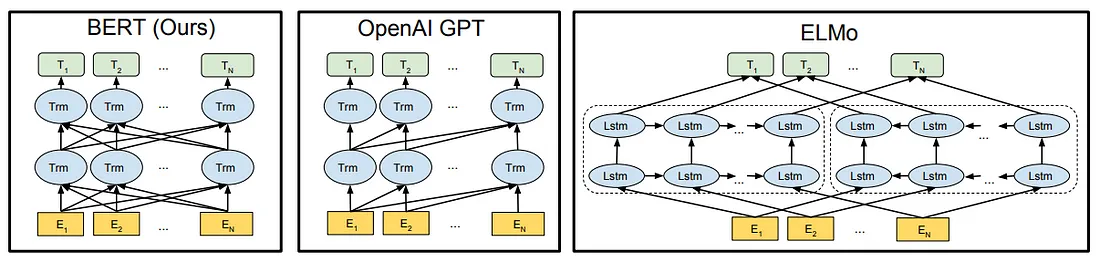

Differences in pre-training model architectures. BERT uses a bidirectional Transformer. OpenAI GPT uses a left-to-right Transformer. ELMo uses the concatenation of independently trained left-to-right and right-to-left LSTMs to generate features for downstream tasks. Among the three, only BERT representations are jointly conditioned on both left and right contexts in all layers.

#1: Why use BERT embeddings?



BERT is able to account for a word's context.

Previous methods of word-embedding would return the same vector for a word no matter how it is used, while BERT returns different vectors for the same word depending on the words around it

# 2: What is an example of BERT embedding?

For example, given two sentences: \
“The man was accused of robbing a bank.”\
“The man went fishing by the bank of the river.” \

Word2Vec would produce the same word embedding for the word “bank” in both sentences, while under BERT the word embedding for “bank” would be different for each sentence.

# 3: What are the benefits of BERT model?

BERT is designed to help computers understand the meaning of ambiguous language in text by using surrounding text to establish context.
The BERT framework was pre-trained using text from Wikipedia and can be fine-tuned with question and answer datasets.

#4: Disadvantages of BERT

The model is large because of the training structure and corpus. It is slow to train because it is big and there are a lot of weights to update. It is expensive. It requires more computation because of its size, which comes at a cost.

# 5: Is BERT supervised or unsupervised?
BERT is a deep bidirectional, unsupervised language representation, pre-trained using a plain text corpus.

# 6: What dataset is BERT trained on?
Both models were pre-trained on the Toronto BooksCorpus (800M words) and English Wikipedia (2,500M words).